Есть два набора данных (во вложении): визиты пользователей на сервис и данные по покупкам. У каждого визита есть источник, а также устройство, с которого заходил пользователь.
```
Файл: purchases – покупки. 
Файл: visits – визиты.
```
```
Обозначения в файлах:
start_dt — дата старта визита,
start_ts — дата и время старта визита,
end_ts — дата окончания визита,
uid — идентификатор пользователя,
source_id — id источника визита,
device — устройство,
buy_ts — дата и время покупки,
revenue — доход в y.e.
```
```
Необходимо определить:

1)	Какая когорта пользователей (по месяцу первой покупки) принесла наибольший средний чек на пользователя, какая наименьший.
2)	Какие аномалии в трафике видите, если они есть.
3)	Какой LTV на каждую когорту пользователей (по месяцу первой покупки)?
4)	С какого source_id мы получили больший доход помесячно, учитывая, что покупку относим к id источника последнего перед покупкой визита.
```

Просьба написать sql-запросы и визуализировать данные с помощью любого инструмента.


In [2]:
import pandas as pd
import plotly_express as px

In [3]:
df1p = pd.read_excel('Источники переделанные в excel/purchases.xlsx')
df2v = pd.read_excel('Источники переделанные в excel/visits.xlsx')

In [4]:
#Просмотр типов данных: 
df1p.info()
df2v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75716 entries, 0 to 75715
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   75716 non-null  datetime64[ns]
 1   uid      75716 non-null  int64         
 2   revenue  75716 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720679 entries, 0 to 720678
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     720679 non-null  object        
 1   end_ts     720679 non-null  object        
 2   source_id  720679 non-null  int64         
 3   start_dt   720679 non-null  datetime64[ns]
 4   start_ts   720679 non-null  object        
 5   uid        720679 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 33.0+ MB


In [5]:
#Просмотр дат в визитах:
df2v.head()

,device,end_ts,source_id,start_dt,start_ts,uid
0,desktop,2016-11-30T11:04:17Z,2,2016-11-30,2016-11-30T10:53:49Z,3758486201
1,desktop,2016-11-10T23:16:57Z,4,2016-11-10,2016-11-10T23:08:04Z,2933941628
2,desktop,2016-10-19T18:51:56Z,1,2016-10-19,2016-10-19T18:48:16Z,1465872791
3,desktop,2017-01-12T20:51:55Z,9,2017-01-12,2017-01-12T20:50:10Z,2751875787
4,touch,2016-07-23T19:17:19Z,4,2016-07-23,2016-07-23T19:10:57Z,3492372810


In [6]:
#Форматирование к одному формату даты: 

df2v['start_ts'] = pd.to_datetime(df2v['start_ts'])
df2v['end_ts'] = pd.to_datetime(df2v['end_ts'])

In [7]:
#Просмотр типов данных: 
df1p.info()
df2v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75716 entries, 0 to 75715
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   75716 non-null  datetime64[ns]
 1   uid      75716 non-null  int64         
 2   revenue  75716 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720679 entries, 0 to 720678
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   device     720679 non-null  object             
 1   end_ts     720679 non-null  datetime64[ns, UTC]
 2   source_id  720679 non-null  int64              
 3   start_dt   720679 non-null  datetime64[ns]     
 4   start_ts   720679 non-null  datetime64[ns, UTC]
 5   uid        720679 non-null  int64              
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), int64(2), obj

In [8]:
#Просмотр дат в визитах:
df2v.head()

,device,end_ts,source_id,start_dt,start_ts,uid
0,desktop,2016-11-30 11:04:17+00:00,2,2016-11-30,2016-11-30 10:53:49+00:00,3758486201
1,desktop,2016-11-10 23:16:57+00:00,4,2016-11-10,2016-11-10 23:08:04+00:00,2933941628
2,desktop,2016-10-19 18:51:56+00:00,1,2016-10-19,2016-10-19 18:48:16+00:00,1465872791
3,desktop,2017-01-12 20:51:55+00:00,9,2017-01-12,2017-01-12 20:50:10+00:00,2751875787
4,touch,2016-07-23 19:17:19+00:00,4,2016-07-23,2016-07-23 19:10:57+00:00,3492372810


In [9]:
#Данные до Join:
print('Покупки', df1p.shape)
print('Визиты', df2v.shape)

Покупки (75716, 3)
Визиты (720679, 6)


In [10]:
#Join файлов:
table1 = pd.merge(df1p, df2v, on='uid', how='left')

In [11]:
#Проверка после Join:
buyDO = print('Исходных покупок', df1p.shape[0])
buyPosle = print('Уникальных покупок после джоина:', table1.groupby(['uid', 'buy_ts']).ngroups)

#Данные после Join:
print('Количество строк table1 после Join:', table1.shape)

#Join работает корректно если buyPosle = buyDO (Количество строк и там и там).

print('Join корректен:', buyDO == buyPosle)

Исходных покупок 75716
Уникальных покупок после джоина: 75716
Количество строк table1 после Join: (5325086, 8)
Join корректен: True


Приступаем к первой задаче:
```
1)	Какая когорта пользователей (по месяцу первой покупки) принесла наибольший средний чек на пользователя, какая наименьший.

```

Подготовка к когортному анализу:

In [12]:
#Шаг 1. Найти первую покупку каждого покупателя (получить даты первых покупок для когорт). 

first_buy = table1.groupby('uid')['buy_ts'].min().reset_index()
first_buy.head()

,uid,buy_ts
0,157352,2016-06-23 13:08:21
1,256370,2016-06-13 18:07:53
2,308857,2016-06-23 09:07:29
3,352142,2017-02-17 18:41:06
4,445960,2016-10-19 13:28:03


In [13]:
#Шаг 2. Переделываем даты в месяцы (когорты).

first_buy['cohort_month'] = first_buy['buy_ts'].dt.to_period('M')

In [14]:
#Шаг 3. Присоединяем  когорты (месяцы) к каждой покупке.

table1_cohort = table1.merge(first_buy[['uid', 'cohort_month']], on='uid')

#Выводим, чтобы просмотреть:
table1_cohort.head()

,buy_ts,uid,revenue,device,end_ts,source_id,start_dt,start_ts,cohort_month
0,2016-07-23 19:13:54,3492372810,1.47,touch,2016-07-23 19:17:19+00:00,4,2016-07-23,2016-07-23 19:10:57+00:00,2016-07
1,2016-07-23 19:13:54,3492372810,1.47,desktop,2017-04-18 15:24:04+00:00,1,2017-04-18,2017-04-18 15:17:26+00:00,2016-07
2,2016-11-06 02:48:27,1564753091,1.11,desktop,2016-11-06 02:54:57+00:00,5,2016-11-06,2016-11-06 02:38:06+00:00,2016-11
3,2016-11-06 02:48:27,1564753091,1.11,desktop,2016-11-06 01:43:14+00:00,5,2016-11-06,2016-11-06 01:25:11+00:00,2016-11
4,2016-11-06 02:48:27,1564753091,1.11,desktop,2016-11-24 14:56:23+00:00,9,2016-11-24,2016-11-24 14:53:35+00:00,2016-11


Когортный анализ: 

In [15]:
#Шаг 1. Группируем по когорте и пользователю, считаем общий доход:


#Сумма выручки по user:
user_renevue = table1_cohort.groupby(['cohort_month', 'uid'])['revenue'].sum().reset_index()

#Средняя выручка по когортам:
cohort_avg_renevue = user_renevue.groupby('cohort_month')['revenue'].mean().sort_values(ascending=False)

print('test:', cohort_avg_renevue)

test: cohort_month
2016-06    9005.433542
2016-09     900.663934
2016-08     580.072637
2016-07     410.136413
2017-03     198.301141
2016-11     143.419334
2016-12      93.084708
2017-01      79.505334
2016-10      65.718453
2017-04      56.236267
2017-02      35.148529
2017-06      17.595000
2017-05      16.761125
Freq: M, Name: revenue, dtype: float64


In [16]:
#Шаг 2. Определяем какая когорта пользователей (по месяцу первой покупки) принесла наибольший средний чек на пользователя, какая наименьший.

WIN_cohort = cohort_avg_renevue.idxmax()
LOSE_cohort = cohort_avg_renevue.idxmin()

print('Лучшая когорта:', WIN_cohort,':','Когорты AVG Выручка:', cohort_avg_renevue.max())
print('Худшая когорта:', LOSE_cohort,':','Когорты AVG Выручка:', cohort_avg_renevue.min())

Лучшая когорта: 2016-06 : Когорты AVG Выручка: 9005.43354231975
Худшая когорта: 2017-05 : Когорты AVG Выручка: 16.761124943413307


Приступаем ко второй задаче: 
```
2)	Какие аномалии в трафике видите, если они есть.
```

Аномалии в трафике:

In [17]:
#Выводим информацию о таблице:
table1_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5325086 entries, 0 to 5325085
Data columns (total 9 columns):
 #   Column        Dtype              
---  ------        -----              
 0   buy_ts        datetime64[ns]     
 1   uid           int64              
 2   revenue       float64            
 3   device        object             
 4   end_ts        datetime64[ns, UTC]
 5   source_id     int64              
 6   start_dt      datetime64[ns]     
 7   start_ts      datetime64[ns, UTC]
 8   cohort_month  period[M]          
dtypes: datetime64[ns, UTC](2), datetime64[ns](2), float64(1), int64(2), object(1), period[M](1)
memory usage: 365.6+ MB


In [18]:
#Напоминаем себе о структуре таблицы:
table1_cohort.head()

,buy_ts,uid,revenue,device,end_ts,source_id,start_dt,start_ts,cohort_month
0,2016-07-23 19:13:54,3492372810,1.47,touch,2016-07-23 19:17:19+00:00,4,2016-07-23,2016-07-23 19:10:57+00:00,2016-07
1,2016-07-23 19:13:54,3492372810,1.47,desktop,2017-04-18 15:24:04+00:00,1,2017-04-18,2017-04-18 15:17:26+00:00,2016-07
2,2016-11-06 02:48:27,1564753091,1.11,desktop,2016-11-06 02:54:57+00:00,5,2016-11-06,2016-11-06 02:38:06+00:00,2016-11
3,2016-11-06 02:48:27,1564753091,1.11,desktop,2016-11-06 01:43:14+00:00,5,2016-11-06,2016-11-06 01:25:11+00:00,2016-11
4,2016-11-06 02:48:27,1564753091,1.11,desktop,2016-11-24 14:56:23+00:00,9,2016-11-24,2016-11-24 14:53:35+00:00,2016-11


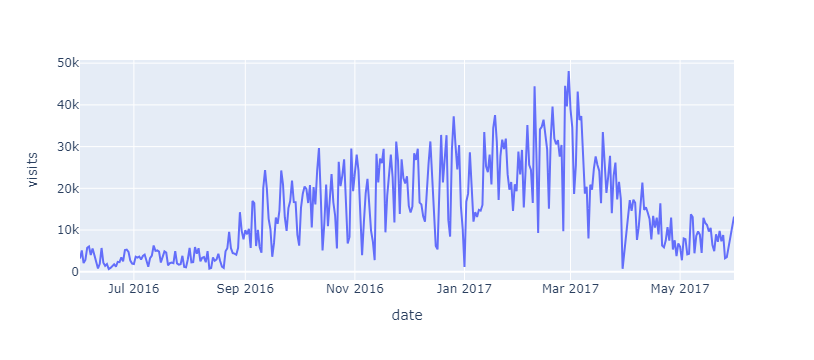

In [21]:
#Выведем сначала график для наглядности. 

visits = table1_cohort.groupby('start_dt').size().reset_index()
visits.columns = ['date', 'visits']
fig = px.line(visits, x='date', y='visits')
fig.show()